# JAX Limb Darkening Laws
This notebook demonstrates several standard limb darkening laws (linear, quadratic, square-root, logarithmic, and nonlinear/Claret 4-parameter), implemented in a fully JIT-compatible way with JAX.

In [9]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

from spice.spectrum.limb_darkening import limb_darkening, get_limb_darkening_law_id

import matplotlib
%matplotlib inline

In [10]:
mu = jnp.linspace(0.0, 1.0, 200)
laws = ["linear", "quadratic", "square_root", "logarithmic", "nonlinear"]
coeff_sets = {
    "linear": jnp.array([0.6, 0.0, 0.0, 0.0]),
    "quadratic": jnp.array([0.3, 0.2, 0.0, 0.0]),
    "square_root": jnp.array([0.4, 0.3, 0.0, 0.0]),
    "logarithmic": jnp.array([0.5, 0.2, 0.0, 0.0]),
    "nonlinear": jnp.array([0.7, 0.3, 0.2, 0.1]),
}

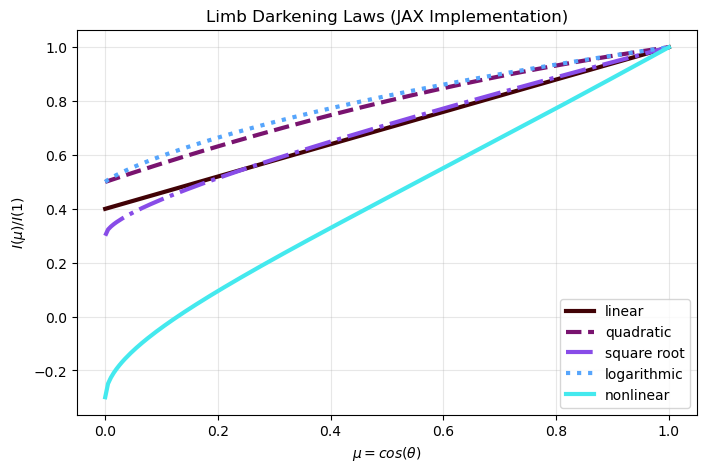

In [18]:
import cmasher as cmr
colors = cmr.gem(jnp.linspace(0, 1, 5))
linestyles = ["-", "--", "-.", ":", "-"]

plt.figure(figsize=(8, 5))
for i, name in enumerate(laws):
    law_id = get_limb_darkening_law_id(name)
    coeffs = coeff_sets[name]
    I = limb_darkening(mu, law_id, coeffs)
    plt.plot(mu, I, label=name.replace("_", " "), c=colors[i], ls=linestyles[i], linewidth=3)

plt.xlabel(r'$\mu = cos(\theta)$')
plt.ylabel(r'$I(\mu)/I(1)$')
plt.title('Limb Darkening Laws (JAX Implementation)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

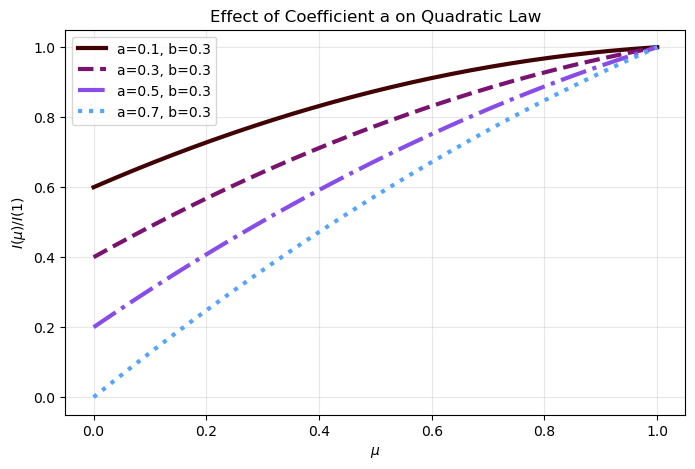

In [19]:
plt.figure(figsize=(8, 5))
a_values = [0.1, 0.3, 0.5, 0.7]
for i, a in enumerate(a_values):
    I = limb_darkening(mu, get_limb_darkening_law_id("quadratic"), jnp.array([a, 0.3]))
    plt.plot(mu, I, label=f'a={a:.1f}, b=0.3', c=colors[i], ls=linestyles[i], linewidth=3)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$I(\mu)/I(1)$')
plt.title('Effect of Coefficient a on Quadratic Law')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

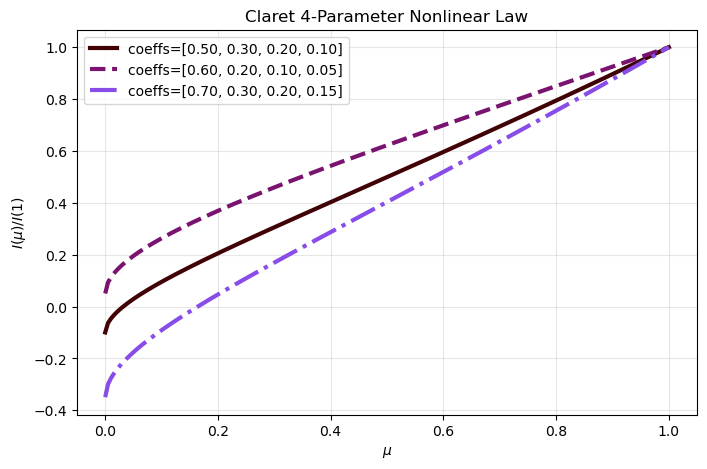

In [20]:
plt.figure(figsize=(8, 5))
sets = [
    jnp.array([0.5, 0.3, 0.2, 0.1]),
    jnp.array([0.6, 0.2, 0.1, 0.05]),
    jnp.array([0.7, 0.3, 0.2, 0.15]),
]
for i, c in enumerate(sets):
    I = limb_darkening(mu, get_limb_darkening_law_id("nonlinear"), c)
    plt.plot(mu, I, label='coeffs=[' + ', '.join(f'{x:.2f}' for x in c.tolist()) + ']', c=colors[i], ls=linestyles[i], linewidth=3)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$I(\mu)/I(1)$')
plt.title('Claret 4-Parameter Nonlinear Law')
plt.legend()
plt.grid(alpha=0.3)
plt.show()